<a href="https://colab.research.google.com/github/OA21796/L3T1/blob/codey/Copy_of_EDAv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart.csv to heart (7).csv
     Age  Sex  Chest_pain_type  Resting_bp  Cholesterol  Fasting_bs  \
0     63    1                3         145          233           1   
1     37    1                2         130          250           0   
2     41    0                1         130          204           0   
3     56    1                1         120          236           0   
4     57    0                0         120          354           0   
..   ...  ...              ...         ...          ...         ...   
298   57    0                0         140          241           0   
299   45    1                3         110          264           0   
300   68    1                0         144          193           1   
301   57    1                0         130          131           0   
302   57    0                1         130          236           0   

     Resting_ecg  Max_heart_rate  Exercise_induced_angina  ST_depression  \
0              0             150     

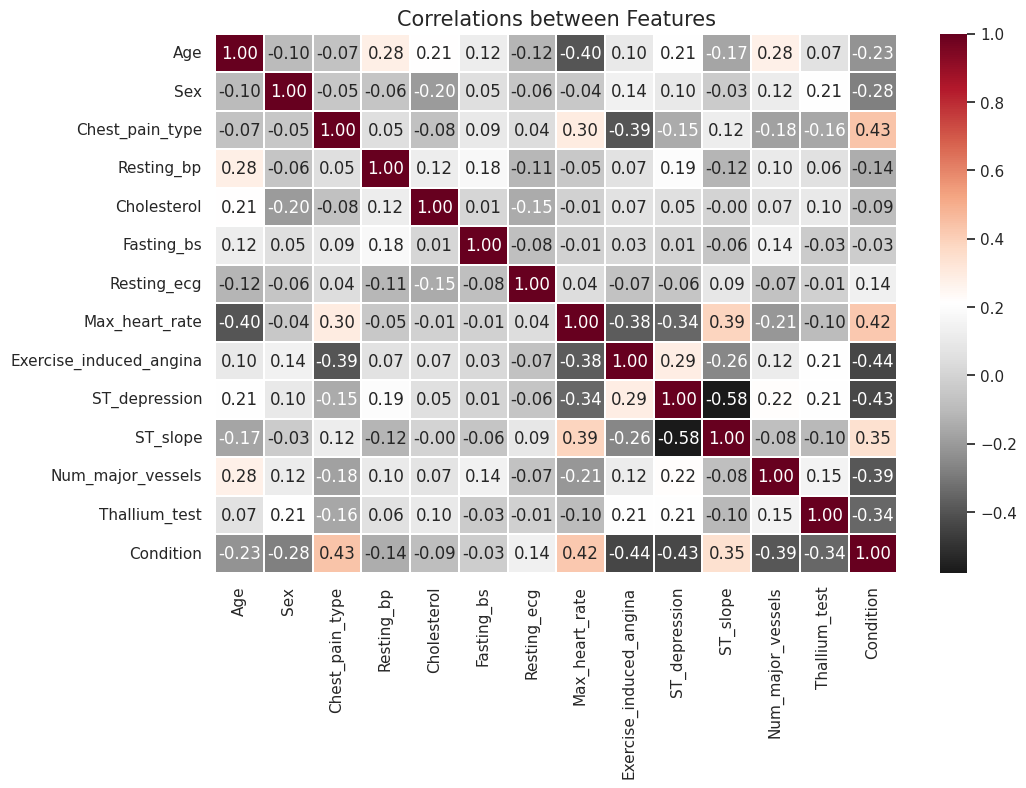

'\n OPE 08/12: Added the remaining functions 15-29\n\n'

In [ ]:
# Importing the relevant libraries required for use to display and query dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

from google.colab import files
from sklearn.model_selection import train_test_split

#Source: https://www.kaggle.com/code/microvision/heart-disease-exploratory-data-analysis/notebook
# [2]
def readData():
  """ reads and returns the csv """
  heart_data = pd.read_csv("heart.csv")
  return heart_data



# [3] & [5]
def printHead(heart_data):
  """ Previews the dataset """
  print(heart_data.head())



# [4]
def renameColumns(heart_data):
  """ Renames the columns to a better understood column name """
  heart_data.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition',
              ]
  return heart_data



# [6]
def describeData(heart_data):
  """ DescribeData takes in the csv, and prints a summary of the following:
     -> count             -> min
     -> mean              -> 25% percentile
     -> std               -> 50% percintile
     -> 75% percintile    -> max val """

  print(heart_data.describe())



# [7]
def infoData(heart_data):
  """ This prints the data types, memory usage, no. of features, and no. of entries made """
  heart_data.info() # prints numbered row by row with datatype, and non null count.
  print()
  print(f'Shape of the dataset')
  print(f'Number of Features: {heart_data.shape[1]}')
  print(f'Number of Observations: {heart_data.shape[0]}')
  # the print statements return the numb of columns and no of entries. f" formatted



# [8]
def checkMissingValues(heart_data):
  """ This checks for missing values in any row """
  print("{:<8}\033[1m Missing values".format(" "))
  print(heart_data.isnull().sum())
  # At current there are no missing values in the dataset



# [9]
def conditionPieChart(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    0 means they do NOT have heart disease. 1 is opposite.
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['lime', 'red']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    print(py)
    print("\nObservations: Most members in the dataset are diagnosed with Malignant, 54.5% (165 cases)."
    "On the other hand, the proportion of Benign in Condition is less than 50%.")



# [10]
def sex_ratio(data):
  """
  Make a pie chart of 'Sex' values
  Sex: 0 = Female, 1 = Male
  A pie chart displaying the ratio between men and women
  """
  print("{:<55}\033[1m Pie Chart showing ratio between Men:Women".format(" "))
  # Pie chart of sex ratio
  results = data['Sex'].value_counts()
  values = [results[0], results[1]]
  labels = ['Female', 'Male']
  colors = ['Red', 'RoyalBlue']

  fig_pie = go.Pie(labels=labels, values=values,
                    marker={'colors': colors,
                            'line': {'color': 'Black', 'width': 2}})
  py.iplot([fig_pie])
  print(py)
  print("\nObservations: Most members in the dataset are male, 68.7% male compared to 31.3% female")



# [11]
def conditionPerSex(data):
    """
    Plot a bar chart of the proportion of Conditon vs.  Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()


    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')
    # I may only need the percentages and not the bar chart??



# [12]
def risk_factors_fbs(data):
    """
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(20, 6))

    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()



# [13]
def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_bp, Chlesterol, and Max_heart_rate
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(data['Resting_bp'])
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')


    # Serum cholesterol
    plt.subplot(2, 3, 2)
    sns.distplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')


    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()



# [14]
def riskFactors_bySex(data):
    """
    Show distributions of risk factors for each sex
    Risk factors include:
     -> Resting blood pressure
     -> Chloestrerol level
     -> Max heart rate
    All presented with a distribution table and standard deviation graph***
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.histplot(trestbps_female, color='Red')
    sns.histplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'],
                palette='Set1', orient='h')


    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.histplot(chol_female, color='Red')
    sns.histplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')


    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.histplot(thalach_female, color='Red')
    sns.histplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'],
                palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()



# [15]
def risk_factors_dist_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.histplot(trestbps_b, color='Green', kde = True)
    sns.histplot(trestbps_m, color='Red', kde = True)
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'],
                orient='h', palette='Dark2')


    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.histplot(chol_b, color='Green', kde = True)
    sns.histplot(chol_m, color='Red', kde = True)
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')


    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.histplot(thalach_b, color='Green', kde = True)
    sns.histplot(thalach_m, color='Red', kde = True)
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')



# [16]
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))

    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')



# [17]
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))

    # Chest pain types for Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types for Sex')


    # Exercise induced angina for Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Sex')
    plt.show()



# [18]
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()



# [19]
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()



# [20]
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()



# [21]
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()



# [22]
def heart_functions_sex(data):
    """
    Make a standard distribution of ST_depression and distributions for Sex and Condition.
    """
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')


    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')

    plt.tight_layout()
    plt.show()



# [23]
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()



# [24]
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()



# [25]
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()



# [26]
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age'])
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()



# [27]
def numeric_features_vs_age(data):
    """
    Effects of features for heart disease by age
    """
    benign = data.Condition==0
    malignant = data.Condition==1

    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]

    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Resting blood pressure (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


    # Serum Cholesterol (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)


    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)

    plt.tight_layout()
    plt.show()



# [28]
def feature_by_Condition(data):
  """ 25 GRAPHS THAT PRESENTS EACH FEATURE BY CONDITION** """
  sns.pairplot(data[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');



# [29]
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()

#Source https://www.kaggle.com/code/microvision/heart-disease-classification/notebook

def train_test_split_data(data):
  heart_data_independent_variables = data.drop(['Condition'], axis=1)
  heart_data_dependent_variable = data.Condition
  hdiv_train, hdiv_test, hddv_train, hddv_test = train_test_split(heart_data_independent_variables, heart_data_dependent_variable, test_size = 0.33, random_state=42)
  print(f'Shape of hdiv_train {hdiv_train.shape}')
  print(f'Shape of hdiv_test {hdiv_test.shape}')
  print(f'Shape of hddv__train {hddv_train.shape}')
  print(f'Shape of hddv_test {hddv_test.shape}')
  return hdiv_train, hdiv_test, hddv_train, hddv_test




def __main__():
  """ this function will hold the main functions required to run this file """
  uploaded = files.upload()                      #this is how googlCollab allows files to be uploaded
  heart_data = readData()                        #heart_data is now the CSV file I will be querying.
  heart_data = renameColumns(heart_data)         #renames the columns to something more readable
  hdiv_train, hdiv_test, hddv_train, hddv_test = train_test_split_data(heart_data)


  # describeData(heart_data)                     #prints a summary of numeric statistics
  # infoData(heart_data)                         #prints the csv schema
  # checkMissingValues(heart_data)               #prints & checks for any missing values in any columns.
  # conditionPieChart(heart_data)                #prints a pie chart that shows the ratio between malignant and benign patients
  # sex_ratio(heart_data)                        #prints a pie chart that shows the ratio between men and women
  # conditionPerSex(heart_data)                  #prints a bar char that shows the proportion of malginant to benign per male and female patients
  # riskFactors_bySex(heart_data)                #prints 6 distribution tables that detail the risk factors in both men and women that include max heart rate, serum cholestrol level and resting-bp
  # risk_factors_dist_condition(heart_data)      #prints histplots of risk factors distribution for condition (benign, malignant)
  # risk_factors_dist(heart_data)                #prints Show distributions of risk factors, Resting_bp, Chlesterol, and Max_heart_rate
  # risk_factors_fbs(heart_data)                 #prints Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
  # printHead(heart_data)                        #prints first 5 rows for each column in the csv file
  # symptoms_features(heart_data)                #prints two bar charts that depict the chest pain types and exercise induced angina
  # symptoms_features_sex(heart_data)            #prints Plot bar charts of chest pain type and exercise induced angina by Sex.
  # symptoms_features_condition(heart_data)      #prints Plot bar charts of chest pain type and exercise induced angina by Condition
  # heart_functions(heart_data)                  #prints a bar chart of Resting_ecg and ST_slope
  # heart_functions_sex(heart_data)              #Prints two bar charts: lot the proportion of Resting_exc and ST_slope for Sex.
  # heart_functions_condition(heart_data)        #Plot the proportion of Resting_exc and ST_slope for Condition.
  # heart_functions_sex(heart_data)              #Make a standard distribution of ST_depression and distributions for Sex and Condition.
  # heart_functions2(heart_data)                 #Prints two bar graphs that plot number of vessels coloured by flourosophy and thaillium scintigraphy
  # heart_functions2_sex(heart_data)             #Plot proportions of Num_major_vessels and Thallium_test for Sex.
  # heart_functions2_condition(heart_data)       #Plot proportions of Num_major_vessels and Thallium_test for Condition.
  # age_distribution(heart_data)                 #Makes a standard distribution and distributions for Sex
  # numeric_features_vs_age(heart_data)          #4x Scatter graphs that show the Effects of features for heart disease by age
  # feature_by_Condition(heart_data)             #25x Plot graphs that present features by condition
  correlation_heatmap(heart_data)              #HEAT MAP: Correlation Heat Map of the features.



if __name__ == "__main__":
  __main__()


"""
 OPE 08/12: Added the remaining functions 15-29

"""




